## **Necessary packages**

In [ ]:
!pip install hazm

In [ ]:
!pip install urlextract

In [ ]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.5/397.5 kB 2.6 MB/s eta 0:00:00


# **Import Libraries**

In [ ]:
from __future__ import unicode_literals #Python 2 compatibility import

from hazm import * # NLP library for the Persian language

import numpy as np
import pandas as pd

import re # re module provides support for regular expressions in Python used for pattern matching and text manipulation.
from urlextract import URLExtract #The urlextract library provides a convenient way to extract URLs from text.
import emoji # It provides functions for emoji detection, conversion, and manipulation.

from tqdm import tqdm # tqdm is a library that provides a progress bar for loops and other iterable objects

from sklearn.feature_extraction.text import TfidfVectorizer # convert text data into a vectorized representation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense
from keras.optimizers import Adadelta,Adam,RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir snapp_food_dataset

In [ ]:
!unzip /content/drive/MyDrive/Kaggle/snappfood.zip -d snapp_food_dataset

Archive:  /content/drive/MyDrive/Kaggle/snappfood.zip
   creating: snapp_food_dataset/snappfood/
  inflating: snapp_food_dataset/snappfood/dev.csv  
  inflating: snapp_food_dataset/snappfood/train.csv  
  inflating: snapp_food_dataset/snappfood/test.csv  


# **Loading Dataset**

In [ ]:
train_df = pd.read_csv("/content/snapp_food_dataset/snappfood/train.csv", on_bad_lines='skip', delimiter='\t', index_col=0)
val_df = pd.read_csv("/content/snapp_food_dataset/snappfood/dev.csv", on_bad_lines='skip', delimiter='\t', index_col=0)
test_df = pd.read_csv("/content/snapp_food_dataset/snappfood/test.csv", on_bad_lines='skip', delimiter='\t', index_col=0)

# **EDA and Preprocessing**

1.   Shape
2.   Info
3.   Missing value



In [ ]:
train_df.head()

,comment,label,label_id
0,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,SAD,1
1,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,HAPPY,0
2,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,SAD,1
3,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,HAPPY,0
4,شیرینی وانیلی فقط یک مدل بود.,HAPPY,0


In [ ]:
val_df.head()

,comment,label,label_id
0,همه ساندویچ‌ها سرد بود متاسفانه در صورتی که فا...,SAD,1
1,تشکر، عالی‌تر از همیشه,HAPPY,0
2,مرغ و کدو رو دوس نداشتم ولی کلا ساندویچهای خوش...,HAPPY,0
3,نمیدونم هزینه بسته بندی به چه دلیل گرفته شد؟؟؟,SAD,1
4,یک نوشابه کم ارسال شد و تاخیر فراوان و غذای نس...,SAD,1


In [ ]:
test_df.head()

,comment,label,label_id
0,خواهشا خواهشا خواهشا واسه ارسال شیرینیها یه فک...,HAPPY,0
1,غذا گرم رسید کیفیت و پخت گوشت عالی بود,HAPPY,0
2,قیمت سس شکلات روی بسته بندی ۱۵۰۰۰ بود ولی قیمت...,SAD,1
3,عکس توی پیج یه شیرینی شکری روشن رنگ هست که همم...,SAD,1
4,باز هم میگم، پیتزا نباید اینقد چرب باشه,SAD,1


### ***1.Shape of dataset***

In [ ]:
# Get the shape and size of the dataset
print("Train set shape: ", train_df.shape)
print("Validation set shape: ", val_df.shape)
print("Test set shape: ", test_df.shape)

Train set shape:  (56700, 3)
Validation set shape:  (6300, 3)
Test set shape:  (7000, 3)


### ***2.Information of dataset***

In [ ]:
# Get more info on dataset
print("Train set information: ")
print("-------------------")
print(train_df.info())
print("\n")
print("Validation set information: ")
print("-------------------")
print(val_df.info())
print("\n")
print("Test set information: ")
print("-------------------")
print(test_df.info())
print("\n")

Train set information: 
-------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 56700 entries, 0 to 56699
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comment   56700 non-null  object
 1   label     56700 non-null  object
 2   label_id  56700 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


Validation set information: 
-------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6300 entries, 0 to 6299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comment   6300 non-null   object
 1   label     6300 non-null   object
 2   label_id  6300 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 196.9+ KB
None


Test set information: 
-------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 0 to 6999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  -----

### ***3.Missing value***

In [ ]:
# Check for any Null values in the dataset
print("Chacking train set missing value: ")
print("-------------------")
print(train_df.isna().sum())
print("\n")
print("Chacking validation set missing value: ")
print("-------------------")
print(val_df.isna().sum())
print("\n")
print("Chacking test set missing value: ")
print("-------------------")
print(test_df.isna().sum())


Chacking train set missing value: 
-------------------
comment     0
label       0
label_id    0
dtype: int64


Chacking validation set missing value: 
-------------------
comment     0
label       0
label_id    0
dtype: int64


Chacking test set missing value: 
-------------------
comment     0
label       0
label_id    0
dtype: int64


So dataset has no missing value :)

### ***Checking the balance of the label***

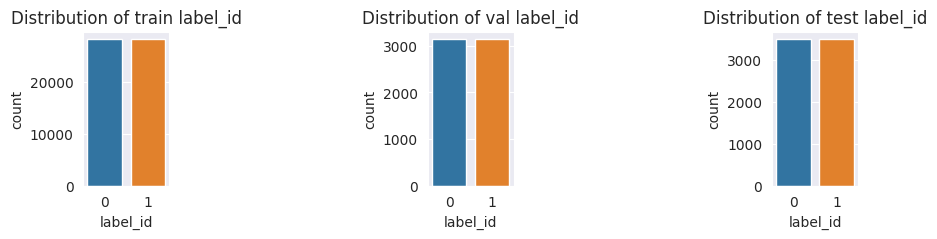

In [ ]:
plt.figure(figsize=(10,2))
plt.subplot(1,3,1)
sns.countplot(data=train_df, x = 'label_id')
plt.title('Distribution of train label_id')
plt.subplot(1,3,2)
sns.countplot(data=val_df, x = 'label_id')
plt.title('Distribution of val label_id')
plt.subplot(1,3,3)
sns.countplot(data=test_df, x = 'label_id')
plt.title('Distribution of test label_id')
plt.subplots_adjust(wspace=3)

Dataset is balance :)

### ***Checking dublicate in dataset***

In [ ]:
# checking : if there are any duplicated comment and label combination in Train set.
column = ['comment', 'label']
train_df[train_df.duplicated(subset=column, keep=False)].sort_values(column).head()

,comment,label,label_id


In [ ]:
# checking : if there are any duplicated comment and label combination in Validation set.
val_df[val_df.duplicated(subset=column, keep=False)].sort_values(column).head()

,comment,label,label_id


In [ ]:
# checking : if there are any duplicated comment and label combination in Test set.
test_df[test_df.duplicated(subset=column, keep=False)].sort_values(column).head()

,comment,label,label_id


There are NO Duplicate rows present :)

### ***Preprocessing on the text:***

Now we want to constructs a regular expression pattern from the keys of the mapping dictionary, and then uses that pattern to replace the matching patterns in the text with their corresponding replacements from the mapping dictionary.

The modified text is then returned by the function.

In [ ]:
def _multiple_replace(mapping, text):
    """
    Perform multiple replacements in a text using the provided mapping.

    Args:
        mapping (dict): A dictionary containing patterns as keys and their corresponding replacements as values.
        text (str): The text in which the patterns should be replaced.

    Returns:
        str: The modified text with the patterns replaced according to the mapping.
    """
    pattern = "|".join(map(re.escape, mapping.keys())) #constructs a regular expression pattern by joining the keys of the mapping dictionary using the "|" character as a separator.
    return re.sub(pattern, lambda m: mapping[m.group()], str(text)) #perform the replacements in the text using the constructed pattern.


We define a function to convert emojis in a text to a more readable and descriptive format by replacing them with a concatenated description:

In [ ]:
def emoji2concat_description(text):
    """
    Convert emojis in a text to a concatenated description of the emojis.

    Args:
        text (str): The input text containing emojis.

    Returns:
        str: The modified text with emojis replaced by a concatenated description.
    """
    emoji_list = list(emoji.EMOJI_DATA.keys())  #list of all the emojis present in the EMOJI_DATA dictionary keys.

    emoji_list = emoji.emoji_list(text) #extracts all the emojis from the text and updates the emoji_list with the extracted emojis.
    ret = emoji.replace_emoji(text, replace='').strip() #This function removes all the emojis from the text and returns the modified text.


    #retrieves the corresponding emoji from the EMOJI_DATA dictionary using the emoji key.
    #It then retrieves the Persian description of the emoji from the fa key
    for json in emoji_list:
        this_desc = ' '.join(emoji.EMOJI_DATA[json['emoji']]['fa'].split('_')).strip(':')
        ret += ' ' + this_desc
    return ret

Below function convert arabic characters to persian characters.

In [ ]:
def convert_Arabic_characters_to_Persian(input_str):
    """
    Convert Arabic characters in a string to their equivalent Persian characters.

    Args:
        input_str (str): The input string containing Arabic characters.

    Returns:
        str: The modified string with Arabic characters converted to Persian characters.
    """
    mapping = {
        'إ':'ا',
        'أ':'ا',
        'ك': 'ک',
        'ؤ':'و',
        'ة':'ه',
        'ى': 'ی',
        'ي': 'ی',
        'ئ':'ی'
    }
    return _multiple_replace(mapping, input_str)

Below function convert persian numbers to english numbers.

In [ ]:
def convert_Persian_num_to_English_num(input_str):
    """
    Convert Persian numbers in a string to their equivalent English numbers.

    Args:
        input_str (str): The input string containing Persian numbers.

    Returns:
        str: The modified string with Persian numbers converted to English numbers.
    """
    mapping = {
        '۰': '0',
        '۱': '1',
        '۲': '2',
        '۳': '3',
        '۴': '4',
        '۵': '5',
        '۶': '6',
        '۷': '7',
        '۸': '8',
        '۹': '9',
        '.': '.',
    }
    return _multiple_replace(mapping, input_str)

We define a function named preprocess that performs various transformations and replacements on input text.


In [ ]:
def preprocess(text):
    """
    Preprocesses the input text by performing various transformations and replacements.

    Args:
        text (str): The input text to be preprocessed.

    Returns:
        str: The preprocessed text.
    """
    extractor = URLExtract() #extract URLs from the text
    for url in extractor.gen_urls(text):
        text = text.replace(url,'<URL>') #replaces the URL in the text with the string <URL>.

    text = emoji2concat_description(text) #convert any emojis in the text to their concatenated description
    text = convert_Persian_num_to_English_num(text) #convert any Persian numbers in the text to English numbers.
    text = convert_Arabic_characters_to_Persian(text) #convert any Arabic characters in the text to Persian characters.

    #regular expressions (regex) to detect and replace all smilies in the text with <smiley>
    text = re.sub(r"(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:\s?D|8-\)|:\s?\||;\s?\)|:-\*|:-\||:-\(|:\s?P|:-P|:-p|:-b|:-O|:-o|:-0|:-\@|:\$|:-\^|:-&|:-\*|:-\+|:-\~|:-\`|:-\>|:-\<|:-\}|:-\{|\[:\s?\]|\[:\s?\]|:\s?\]|:\s?\[|:\s?\}|:\s?\{)",'<smiley>',text)

    text = text.lower() #we lowercase here to prevent changes in the URLs and smilies
    text = text.strip() #we reomve whitespace in the text
    text = re.sub(r'[<>#.:()"\'!?؟،,@$%^&*_+\[\]/]', ' ', text) #we replace punctuation with a single space
    text = re.sub(r'[\s]{2,}', ' ', text) #we replace consecutive spaces with a single space.
    text = re.sub(r'(\w)\1{2,}', r'\1',text) #we remove elongation character

    if re.search(r'[\u0600-\u06FF]', text): #replace Finglish comment with None
        return(text)
    else:
        return 'None'

In [ ]:
tqdm.pandas()

In [ ]:
train_df['cleaned_comment'] = train_df['comment'].progress_apply(preprocess)
val_df['cleaned_comment'] = val_df['comment'].progress_apply(preprocess)
test_df['cleaned_comment'] = test_df['comment'].progress_apply(preprocess)

100%|██████████| 7000/7000 [02:36<00:00, 44.61it/s]


Drop Finglish (None) value:

In [ ]:
train_df = train_df.dropna()
val_df = val_df.dropna()
test_df = test_df.dropna()

In [ ]:
train_df.head()

,comment,label,label_id,cleaned_comment
0,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح,SAD,1,واقعا حیف وقت که بنویسم سرویس دهیتون شده افتضاح
1,قرار بود ۱ ساعته برسه ولی نیم ساعت زودتر از مو...,HAPPY,0,قرار بود 1 ساعته برسه ولی نیم ساعت زودتر از مو...
2,قیمت این مدل اصلا با کیفیتش سازگاری نداره، فقط...,SAD,1,قیمت این مدل اصلا با کیفیتش سازگاری نداره فقط ...
3,عالللی بود همه چه درست و به اندازه و کیفیت خوب...,HAPPY,0,عالی بود همه چه درست و به اندازه و کیفیت خوب ا...
4,شیرینی وانیلی فقط یک مدل بود.,HAPPY,0,شیرینی وانیلی فقط یک مدل بود


In [ ]:
val_df.head()

,comment,label,label_id,cleaned_comment
0,همه ساندویچ‌ها سرد بود متاسفانه در صورتی که فا...,SAD,1,همه ساندویچ‌ها سرد بود متاسفانه در صورتی که فا...
1,تشکر، عالی‌تر از همیشه,HAPPY,0,تشکر عالی‌تر از همیشه
2,مرغ و کدو رو دوس نداشتم ولی کلا ساندویچهای خوش...,HAPPY,0,مرغ و کدو رو دوس نداشتم ولی کلا ساندویچهای خوش...
3,نمیدونم هزینه بسته بندی به چه دلیل گرفته شد؟؟؟,SAD,1,نمیدونم هزینه بسته بندی به چه دلیل گرفته شد
4,یک نوشابه کم ارسال شد و تاخیر فراوان و غذای نس...,SAD,1,یک نوشابه کم ارسال شد و تاخیر فراوان و غذای نس...


In [ ]:
test_df.head()

,comment,label,label_id,cleaned_comment
0,خواهشا خواهشا خواهشا واسه ارسال شیرینیها یه فک...,HAPPY,0,خواهشا خواهشا خواهشا واسه ارسال شیرینیها یه فک...
1,غذا گرم رسید کیفیت و پخت گوشت عالی بود,HAPPY,0,غذا گرم رسید کیفیت و پخت گوشت عالی بود
2,قیمت سس شکلات روی بسته بندی ۱۵۰۰۰ بود ولی قیمت...,SAD,1,قیمت سس شکلات روی بسته بندی 150 بود ولی قیمت ا...
3,عکس توی پیج یه شیرینی شکری روشن رنگ هست که همم...,SAD,1,عکس توی پیج یه شیرینی شکری روشن رنگ هست که همم...
4,باز هم میگم، پیتزا نباید اینقد چرب باشه,SAD,1,باز هم میگم پیتزا نباید اینقد چرب باشه


## **Save the preprocessed data to new CSV**

In [ ]:
train_df.to_csv('/content/drive/MyDrive/train_preprocessed.csv', index=False)
val_df.to_csv('/content/drive/MyDrive/validation_preprocessed.csv', index=False)
test_df.to_csv('/content/drive/MyDrive/test_preprocessed.csv', index=False)

# **Moldel Building**

### ***Splitting***

In [ ]:
X_train = train_df['cleaned_comment']
X_val = val_df['cleaned_comment']
X_test = test_df['cleaned_comment']

y_train = train_df['label_id']
y_val = val_df['label_id']
y_test = test_df['label_id']

### ***Vectorizing***

In [ ]:
#convert text data into a vectorized representation
vectorizer = TfidfVectorizer(min_df=2, max_features= 10000) # word must appear in at least 2 documents to be considered
                                                            # maximum number of features (words) = 10,000

X_train_tfidf_vectorized = vectorizer.fit_transform(X_train).toarray()
X_val_tfidf_vectorized = vectorizer.transform(X_val).toarray()
X_test_tfidf_vectorized = vectorizer.transform(X_test).toarray()

#### ***Logistic Regression***

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_tfidf_vectorized, y_train)

LogisticRegression()

We use weighted F1-score .weighted F1-score, is a metric that combines precision and recall to evaluate the performance of a classification model

In [ ]:
y_pred = lr.predict(X_val_tfidf_vectorized)
report = classification_report(y_val, y_pred)
weighted_f1_score = f1_score(y_val, y_pred, average='weighted')

In [ ]:
print(report)
print(weighted_f1_score)

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      3150
           1       0.83      0.90      0.86      3150

    accuracy                           0.86      6300
   macro avg       0.86      0.86      0.86      6300
weighted avg       0.86      0.86      0.86      6300

0.8573019083909613


In [ ]:
x_pred = vectorizer.transform([preprocess('دیگه از این رستوران سفارش نمیدم')]).toarray()

In [ ]:
lr.predict(x_pred)

array([1])

Meaning SAD!

### ***Random Forest***

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_tfidf_vectorized, y_train)

RandomForestClassifier()

In [ ]:
y_pred = lr.predict(X_val_tfidf_vectorized)
report = classification_report(y_val, y_pred)
weighted_f1_score = f1_score(y_val, y_pred, average='weighted')

In [ ]:
print(report)
print(weighted_f1_score)

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      3150
           1       0.83      0.90      0.86      3150

    accuracy                           0.86      6300
   macro avg       0.86      0.86      0.86      6300
weighted avg       0.86      0.86      0.86      6300

0.8573019083909613


In [ ]:
rf.predict(x_pred)

array([1])

Meaning SAD!

### ***LSTM***

***Text preprocessing steps using the Tokenizer class***

In [ ]:
tokenizer = Tokenizer(num_words=20000)# This specifies that only the 20,000 most common words in the training dataset will be kept, and other less frequent words will be discarded.
tokenizer.fit_on_texts(X_train) # builds the vocabulary of the tokenizer based on the words present in X_train.

X_train = tokenizer.texts_to_sequences(X_train) # The X_train data, which consists of text samples, is converted into sequences of integers using the fitted tokenizer.
                                                # Each word in the text is replaced by its corresponding integer index from the tokenizer's vocabulary.

X_train = pad_sequences(X_train, maxlen=100)  # The sequences of integers obtained from the previous step are padded or truncated to a fixed length of 100.
X_val = tokenizer.texts_to_sequences(X_val)
X_val = pad_sequences(X_val, maxlen=100)

X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=100)

In [ ]:
print("X_train shape: ", X_train.shape)
print("X_val shape: ", X_val.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (56700, 100)
X_val shape:  (6300, 100)
X_test shape:  (7000, 100)


In [ ]:
# Transforming the target labels into a one-hot encoded matrix format for binary classification.
y_train_cat = to_categorical(y_train, 2)
y_val_cat = to_categorical(y_val, 2)
y_test_cat = to_categorical(y_test, 2)

In [ ]:
rnn_model = Sequential([
    Embedding(input_dim=20000, output_dim=32, input_shape=(X_train.shape[1],)),# convert the input sequence of word indices into dense vectors of fixed size
    Bidirectional(LSTM(128, return_sequences=True)), # Bidirectional capture contextual information from both past and future words.
    Bidirectional(LSTM(128)),
    Dense(64, activation='relu'), # Dense layer
    Dense(2, activation='softmax') # final Dense layer has 2 units, representing the number of classes in classification problem
])

In [ ]:
# prepares the model to be trained on the training data
rnn_model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
# using EarlyStopping to prevent overfitting
callback = EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
rnn_model.fit(X_train, y_train_cat, epochs=10,
              validation_data=(X_val, y_val_cat),
              callbacks=[callback])

Epoch 1/10
1772/1772 [==============================] - 128s 62ms/step - loss: 0.4103 - accuracy: 0.8110 - val_loss: 0.3467 - val_accuracy: 0.8514
Epoch 2/10
1772/1772 [==============================] - 46s 26ms/step - loss: 0.3290 - accuracy: 0.8616 - val_loss: 0.3456 - val_accuracy: 0.8513
Epoch 3/10
1772/1772 [==============================] - 56s 32ms/step - loss: 0.3053 - accuracy: 0.8734 - val_loss: 0.3447 - val_accuracy: 0.8525
Epoch 4/10
1772/1772 [==============================] - 39s 22ms/step - loss: 0.2881 - accuracy: 0.8825 - val_loss: 0.3516 - val_accuracy: 0.8508
Epoch 5/10
1772/1772 [==============================] - 39s 22ms/step - loss: 0.2745 - accuracy: 0.8900 - val_loss: 0.3554 - val_accuracy: 0.8481


***Prediction***

In [ ]:
y_test_pred = rnn_model.predict(X_test)
y_test_predclass = np.argmax(y_test_pred, axis=1)

219/219 [==============================] - 3s 8ms/step


In [ ]:
print ("Test accuracy:",(round(accuracy_score(y_test, y_test_predclass),4)*100))

Test accuracy: 84.64


In [ ]:
report = classification_report(y_test, y_test_predclass)
weighted_f1_score = f1_score(y_test, y_test_predclass, average='weighted')

In [ ]:
print(report)
print(weighted_f1_score)

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      3500
           1       0.83      0.87      0.85      3500

    accuracy                           0.85      7000
   macro avg       0.85      0.85      0.85      7000
weighted avg       0.85      0.85      0.85      7000

0.846336872173045


In [ ]:
x_pred = tokenizer.texts_to_sequences(['غذا اصلا مزه خوبی نداشت'])
x_pred = pad_sequences(x_pred, maxlen=100)

In [ ]:
rnn_model.predict(x_pred)

1/1 [==============================] - 0s 63ms/step


array([[0.11616457, 0.8838355 ]], dtype=float32)

With a probability of 88%, the comment is SAD.